In [283]:
#import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,7) # to set the default height and width of all plots in this notebook
plt.style.use('ggplot') # to use R's ggplot style for visuals


In [284]:
df = pd.read_excel(r'Certified Seed Data for Pythone Project.xlsx')
df.head()

,Year,Zone,Season,Category,Crop,Production (mt),Ha,yield/ha,State,Class,Remarks
0,2009,South East,Wet,CBOs,Rice,3.0,1.0,3.0,Abia,Certified,Pass
1,2009,South East,Wet,CBOs,Rice,18.0,6.0,3.0,Abia,Certified,Pass
2,2009,South East,Wet,CBOs,Rice,12.0,4.0,3.0,Abia,Certified,Pass
3,2009,South South,Wet,CBOs,Rice,1.5,0.5,3.0,Akwa Ibom,Certified,Pass
4,2009,South South,Wet,CBOs,Rice,2.1,0.7,3.0,Akwa Ibom,Certified,Pass


In [285]:
df['yield/ha'].describe()

count    39208.000000
mean         2.810617
std         19.957044
min          0.260000
25%          1.700000
50%          3.000000
75%          3.000000
max       3180.000000
Name: yield/ha, dtype: float64

In [286]:
df.dtypes

Year                 int64
Zone                object
Season              object
Category            object
Crop                object
Production (mt)    float64
Ha                 float64
yield/ha           float64
State               object
Class               object
Remarks             object
dtype: object

##### The data has 11 features and 39k+ observations. 
#### 7 of the features are categorical data, 3 features are floats and one of the features is a year data type

In [287]:
df.isna().sum()

Year               0
Zone               0
Season             0
Category           0
Crop               0
Production (mt)    0
Ha                 0
yield/ha           0
State              0
Class              0
Remarks            0
dtype: int64

There are no missing values in the data

In [288]:
# Checks for unique values in the year column
df.Year.unique()

array([2009, 2010, 2011, 2012, 2013, 2014, 2015], dtype=int64)

In [289]:
df.describe().astype(int)

,Year,Production (mt),Ha,yield/ha
count,39208,39208,39208,39208
mean,2013,198,5,2
std,1,25932,51,19
min,2009,0,0,0
25%,2013,3,2,1
50%,2014,6,3,3
75%,2014,17,7,3
max,2015,5056200,9224,3180


# Cleaning the data
1. Identify overly large values and drop them
2. Calculate another production variable by multiplying yield per hectare to land area
3. Replace any value in yield per hacrate to 3 which is the median value
4. Drop columns that are irrelevant

In [290]:
# Find row where area = 9224
df[df.loc[:,'Ha'] == 9224]


,Year,Zone,Season,Category,Crop,Production (mt),Ha,yield/ha,State,Class,Remarks
30013,2012,North West,Wet,Companies,Cotton,11991.2,9224.0,1.3,Katsina,Certified,Pass


In [291]:
df.drop(axis = 0, index =[30013, 16747], inplace = True)

In [292]:
# Find row where production = 5056200
df[df.loc[:,'Production (mt)'] == 5056200]

,Year,Zone,Season,Category,Crop,Production (mt),Ha,yield/ha,State,Class,Remarks


In [293]:
# For y/ha: replace any value > 3 with 3 
df['yield/ha'].values[df['yield/ha' ]> 3] = 3 


In [294]:
# Create a new production variable by multiplying area and yield 
df['Production'] = df['yield/ha'] * df['Ha']
df.describe().astype(int)

,Year,Production (mt),Ha,yield/ha,Production
count,39206,39206,39206,39206,39206
mean,2013,69,5,2,14
std,1,4524,21,0,55
min,2009,0,0,0,0
25%,2013,3,2,1,3
50%,2014,6,3,3,6
75%,2014,17,7,3,15
max,2015,663552,2500,3,4250


In [295]:
print('Total Production from 2009 to 2015:', df['Production'].sum())

Total Production from 2009 to 2015: 553970.0579


In [296]:
# Drop irrlevant variables from the data
df.drop(['Production (mt)', 'Class', 'Remarks'], axis = 1, inplace = True)

In [297]:
df.describe().astype(int)

,Year,Ha,yield/ha,Production
count,39206,39206,39206,39206
mean,2013,5,2,14
std,1,21,0,55
min,2009,0,0,0
25%,2013,2,1,3
50%,2014,3,3,6
75%,2014,7,3,15
max,2015,2500,3,4250


# Univariate Analysis: to explore variables  one by one

Year
2009     14310
2010     10910
2011     24590
2012     31890
2013    147361
2014    203589
2015    121317
Name: Production, dtype: int32

<AxesSubplot:xlabel='Year'>

(array([     0.,  25000.,  50000.,  75000., 100000., 125000., 150000.,
        175000., 200000., 225000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

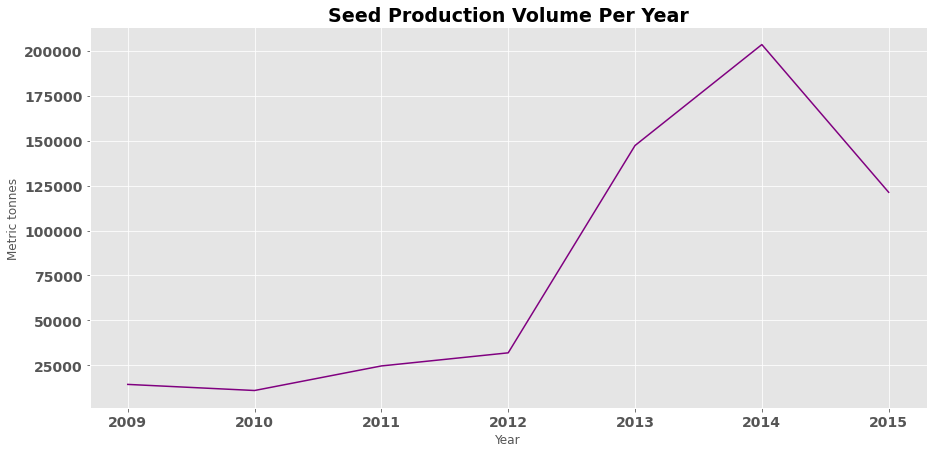

In [298]:
# What was the yearly production of certified seeds?
display(df.groupby('Year')['Production'].sum().astype(int))

# Plot the answer
display(df.groupby('Year')['Production'].sum().astype(int).plot.line(color ='purple'))

plt.xticks(rotation = 0, fontweight = 'bold', fontsize =14)
plt.title('Seed Production Volume Per Year', fontsize = 19, fontweight = 'bold')
plt.ylabel('Metric tonnes')
plt.yticks(fontweight = 'bold',fontsize =14)


Seed production gradually increased up until 2013 where total production jumped from less than 50k metric tonnes to 150k metric tonnes. This incease continued for one year and then dropped in 2015. 

<AxesSubplot:xlabel='Ha', ylabel='Production'>

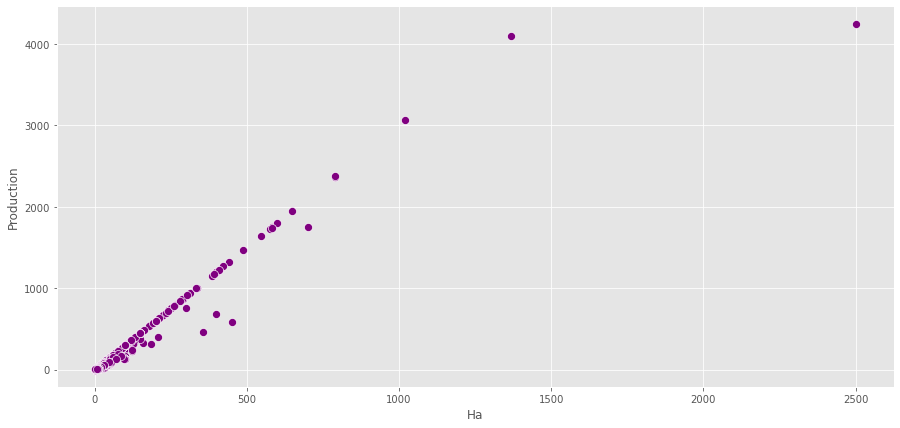

In [299]:
sns.scatterplot(x=df['Ha'], y=df['Production'], color = 'purple', s= 65 )

The scatter plot indicates that volume increases as seed prodcuers have more land to work with

Text(0, 0.5, 'Metric tonnes')

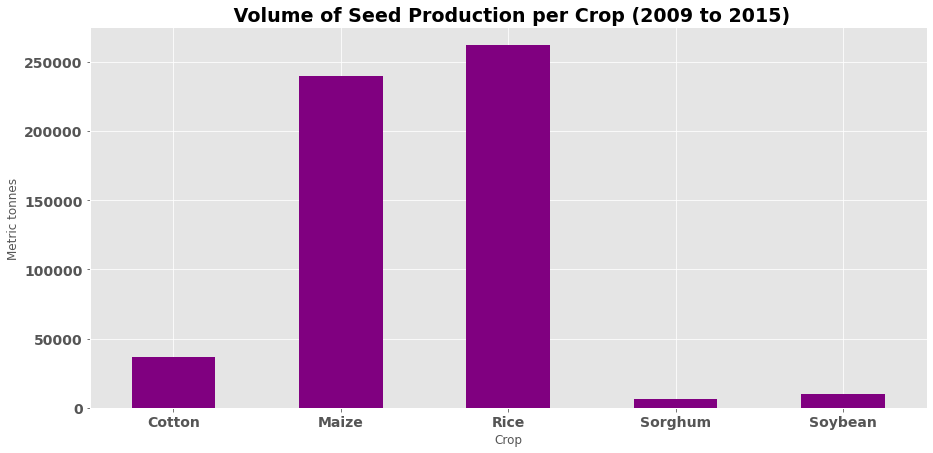

In [300]:
# Calculate seed production volume by crop
DS =df.groupby(['Crop', 'Zone'])['Production'].sum().astype(int)

#Plot the data
df.groupby('Crop')['Production'].sum().astype(int).plot.bar(color ='purple')
plt.title(' Volume of Seed Production per Crop (2009 to 2015)',  fontsize = 19, fontweight = 'bold')
plt.xticks(rotation = 0, fontweight = 'bold',fontsize =14)
plt.yticks(fontweight = 'bold',fontsize =14)
plt.ylabel('Metric tonnes')

 What is the volume of seed production  in metric tonne for each crop for the duration under review?

Text(0, 0.5, '(In Metric Tonnes)')

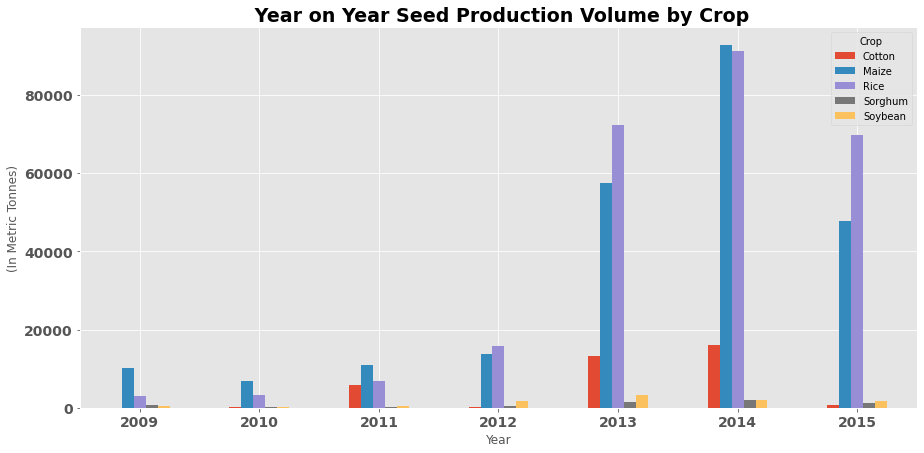

In [301]:
pd.pivot_table(values = 'Production', index = 'Year', columns = 'Crop', data = df,aggfunc=np.sum).astype(int)

#Plot the data
pd.pivot_table(values = 'Production', index = 'Year', columns = 'Crop', data = df,aggfunc=np.sum).astype(int).plot.bar()
plt.title(' Year on Year Seed Production Volume by Crop', fontsize = 19, fontweight = 'bold')
plt.xticks(rotation = 0, fontweight = 'bold',fontsize =14)
plt.yticks( fontweight = 'bold',fontsize =14)
plt.ylabel('(In Metric Tonnes)')

### Explanation:

1. Seed production in Nigeria was on the increase from year 2009 to 2014. The increase in production was attributed to FGN intervention in 2012 through GES (Growth Enhancement Scheme) program. However, there was a sharp decline in 2015.


2. 2014 recorded the largest production of seed in Nigeria because of the availability of Breeder and Foundation seeds


3. The major staples maize and rice account for the largest volume of seed production for the period under review


At a granular level, what states in nigeria produce the most seeds?

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

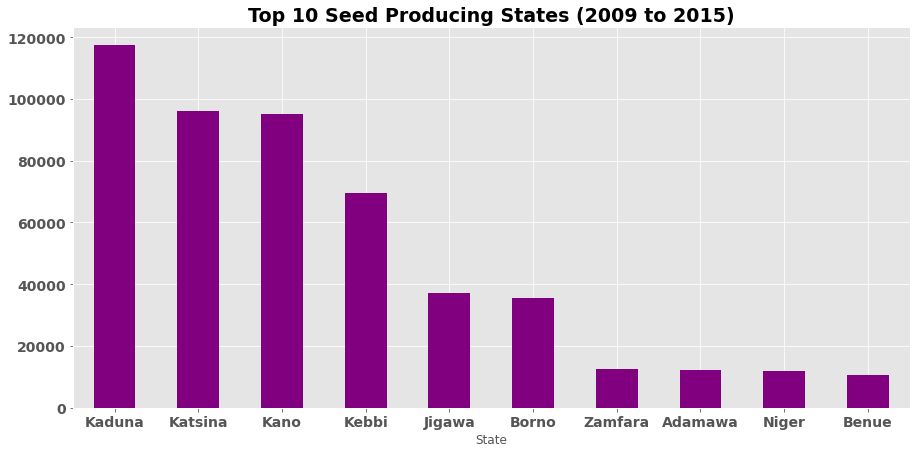

In [302]:
# Calculate seed production volumes by top 10 states and save it ina variable called Top_10_states
Top_10_states = df.groupby('State')['Production'].sum().astype(int).sort_values(ascending=False)[:10]

# Plot Top_10_states
Top_10_states.plot.bar(color = 'purple')
plt.title('Top 10 Seed Producing States (2009 to 2015)', fontweight = 'bold',fontsize =19)
plt.xticks(rotation =0,fontweight = 'bold',fontsize =14)
plt.yticks(fontweight = 'bold',fontsize =14)


In [303]:
# What is the total volume of production by the top 10 states?
t_10 =Top_10_states.sum()
print(f'\nThe top 10 states produce a total of {t_10} Metric tonnes.')


The top 10 states produce a total of 498133 Metric tonnes.


 For the seeds produced per zone, I wanted to illustrate how each zone was performing on average using a pie chart. 

,Production
Zone,
North Central,15
North East,16
North West,13
South East,7
South South,11
South West,14


Text(0.5, 1.0, 'Zonal Volume of Seed Production in % (2009 to 2015)')

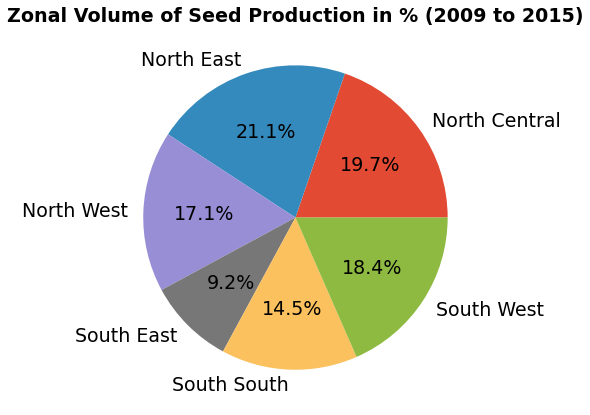

In [304]:
# Calculate production by zone and assign it to v
v=df[['Zone', 'Production']].groupby(['Zone']).mean().astype(int)
display(v)
v.reset_index(level=['Zone'],inplace=True) # to set the zones and indexes

plt.pie(v['Production'], labels = v['Zone'], autopct='%1.1f%%', textprops={'fontsize': 19})
plt.title('Zonal Volume of Seed Production in % (2009 to 2015)', fontweight = 'bold',fontsize =19)

 What seeds do these zones specialize in on the average?

Text(0.5, 1.0, 'Average Seed Production Capacity of the Zones per Crop')

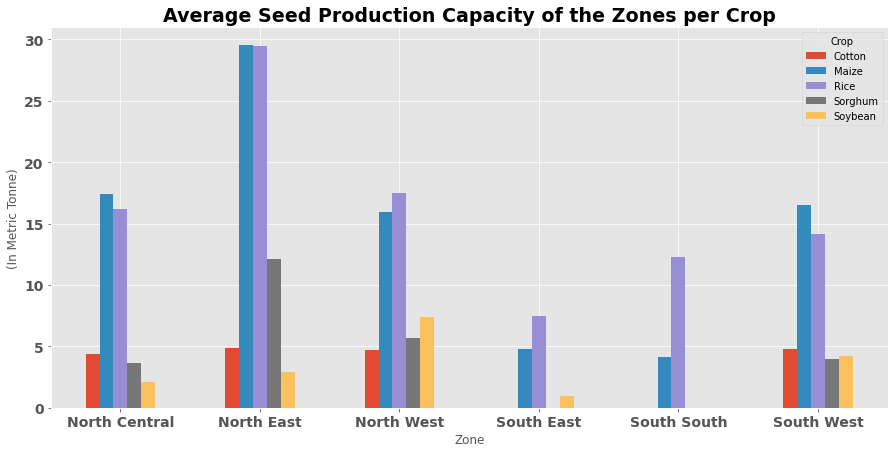

In [305]:
# Create a pivot table and fill all NaN with zero
a= pd.pivot_table(values = 'Production', index = 'Zone', columns = 'Crop', data = df,aggfunc=np.mean, fill_value=0)

#Plot the results
a.plot.bar()
plt.xticks(rotation = 0, fontweight = 'bold',fontsize =14)
plt.yticks( fontweight = 'bold',fontsize =14)
plt.ylabel('(In Metric Tonne)')
plt.title('Average Seed Production Capacity of the Zones per Crop', fontweight = 'bold',fontsize =19)

#### Observations
1. The Northern regions produce a significant amount of maize, rice and sorghum. 
2. Soybean is concentrated between the North West and South West regions. 
3. The Southern regions are also capable of producing certifiable maize and rice seeds. 
4. In the southern part of the country, only the South West produces cotton

It was established earlier that land area and output have a positive relationship. So, which zone has more land to play with?

Crop,Cotton,Maize,Rice,Sorghum,Soybean
Zone,,,,,
North Central,44.0000,2142.2899,12633.4903,29.5000,86.5530
North East,5689.0000,12164.5291,6643.9930,2015.9804,582.4113
North West,24776.5000,71844.5015,63873.2100,2489.2800,5592.8379
South East,0.0000,29.4000,749.7029,0.0000,0.5000
South South,0.0000,8.2000,442.4000,0.0000,0.0000
South West,67.6332,2890.5139,3120.3681,2.0000,99.5503


Text(0.5, 1.0, 'Zonal Land Mass Available for Seed Production (2009-2015)')

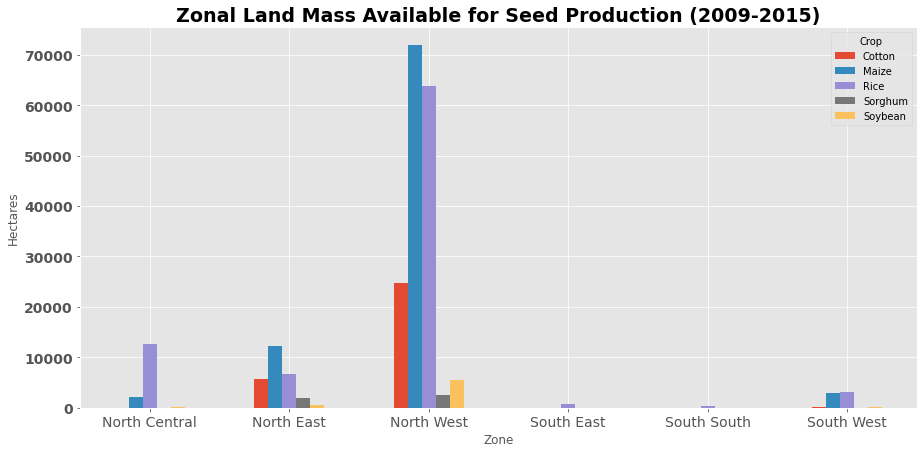

In [306]:
# Add up the land area for the differet zones and show the volumns of seeds produced in these areas
Land_mass = pd.pivot_table(values = 'Ha', index = 'Zone',columns = 'Crop', data = df, aggfunc= np.sum,  fill_value=0)
display(Land_mass)

# Plot the data
Land_mass.plot.bar()
plt.xticks(rotation = 0,fontsize =14)
plt.yticks( fontweight = 'bold',fontsize =14)
plt.ylabel('Hectares')
plt.title('Zonal Land Mass Available for Seed Production (2009-2015)', fontweight = 'bold',fontsize =19)

#### Observations:
1. The other zones apart from the North West have less than 20,000 hectares of land to work with respectively
2. While these zones that appear disadvantaged due to land area constraints, their average contributions suggest that given more access to land, these areas will most likely increase their outputs significantly.

The variable labelled 'Category' consists of private enterprises and community based organizations made up of local farmers. Who contributes more to the total on the avearge?

Text(0.5, 1.0, 'Average Seed Production by Industry Players (in metric tonnes)')

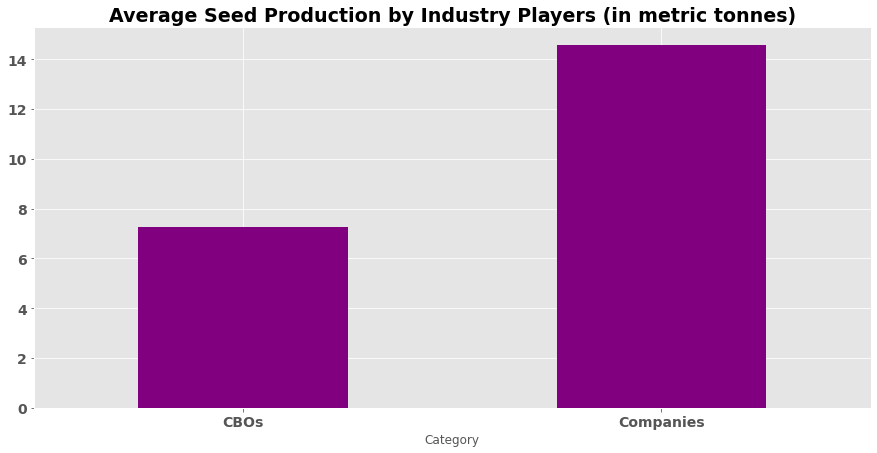

In [307]:
# Calculate average total seed production by Category
df.groupby('Category')['Production'].mean()
# Plot the data 
df.groupby('Category')['Production'].mean().plot.bar(color = 'purple')
plt.xticks(rotation =0,fontweight = 'bold',fontsize =14)
plt.yticks(fontweight = 'bold',fontsize =14)
plt.title('Average Seed Production by Industry Players (in metric tonnes)', fontsize = 19, fontweight = 'bold')

 Private companies are responsible for twice the volume of seed production. But what do these catgeories specialize in?

Text(0.5, 1.0, 'Average Seed Production Capacity of the Categories per Crop')

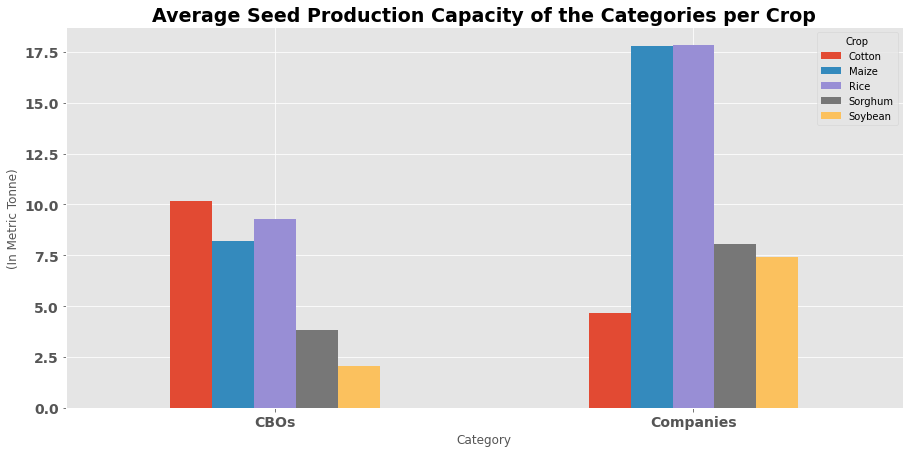

In [308]:
# Create a pivot table to calculate the average volume of production for the two industry players
B = pd.pivot_table(values = 'Production', index = 'Category', columns = 'Crop', data = df,aggfunc=np.mean, fill_value=0)

#Plot the results
B.plot.bar()
plt.xticks(rotation = 0, fontweight = 'bold',fontsize =14)
plt.yticks( fontweight = 'bold',fontsize =14)
plt.ylabel('(In Metric Tonne)')
plt.title('Average Seed Production Capacity of the Categories per Crop', fontweight = 'bold',fontsize =19)

In [309]:
df['Category'].value_counts()

Companies    36937
CBOs          2269
Name: Category, dtype: int64

#### Observation
The CBOs produce more cotton seeds than private coys. Despite their number, these farmers on the average produce twice as much cotton than their private counterparts. 
 